/home/matthew/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


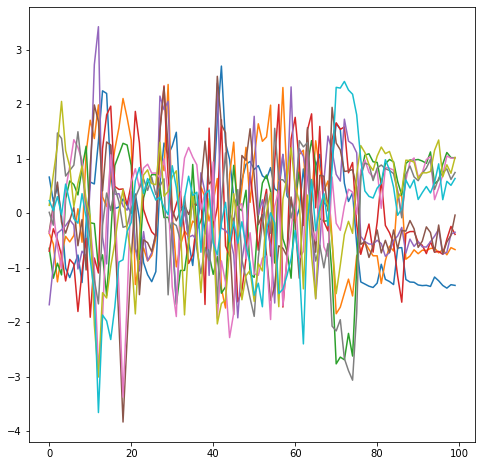

In [19]:
import pyaudio
import time
import numpy as np
import librosa
import matplotlib.pyplot as plt

RATE = 44100
FPS = 10
CHUNK = int(RATE/FPS)
n_mfcc = 10
n_sec=10


def soundplot(stream):
        t1 = time.time()
        data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
        # process and obtain results
        res = np.mean(librosa.feature.mfcc(y=data.astype(float),
                                           sr=RATE,
                                           n_mfcc=n_mfcc).T, axis=0)
        return res

p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16,
               channels=1,
               rate=RATE,
               input=True,
               frames_per_buffer=CHUNK)
res = np.zeros((n_sec*FPS, n_mfcc))

for i in range(n_sec*FPS):
    res[i,] = soundplot(stream)
stream.stop_stream
stream.close
p.terminate()

# plot the results
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
for i in range(n_mfcc):
    ax.plot(range(n_sec*FPS), (res[:,i]-np.mean(res[:,i]))/np.std(res[:,i]))
    